In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

## Simulation setup

#### Simulation setup

In [2]:
sim = rw.Simulation()

start simulation


#### Source 

In [3]:
nr_particles = 1*10**2
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1 #1/2**0.5 # (delta_r_rho / delta_r_phi)
energy = 3*10**15 # eV
phi = 0.0
pitch_angle = 2*np.pi * 54.74/360 # pitch angle for equal components in all directions
        

source = rw.PointSourceOriented(energy, source_pos, nr_particles, pitch_angle, phi)
sim.add_source(source)
sim.source.get_description()

Description Source:
                The source defines the start conditions of the particles 
                and covers the position, direction, energy, etc

position:  [0. 0. 0.]
number particles:  100
energy:  3000000000000000  eV
source tpye: PointSourceOriented
pitch angle:  0.955393232541696
phi:  0.0


#### Propagator

In [4]:
nr_steps = 1*10**4
step_size = 0.5*10**10 # [m]
mfp = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12], dtype=np.float32)  # [m]
rms = 1 # Gaus
magnetic_field = rw.OrderedBackgroundField(rms, [0,0,1]).magnetic_field

propagator = rw.AnisotropicPropagator(magnetic_field, mfp, nr_steps, step_size)
#propagator.set_pitch_angle_const(False)
sim.add_propagator(propagator)
sim.propagator.get_description()

Propagator initialized
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

propagation tpye: AnisotropicPropagator
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

coordinates: Cylindrical coordinates
dimensions:  3
pitch angle: constant
particle sp

#### Observer

In [5]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 200
spheres = [10**12]

#observer = rw.TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)
observer = rw.SphericalObserver(substeps, spheres)

sim.add_observer(observer)
sim.observer.get_description()

number steps:  0
Observer initialized
Description Observer:
                The observer defines the conditions for when to write data to the output.

observer tpye: SphericalObserver
spheres:  [-1.e+00  1.e+12]
steps [0:10]:  []
steps [-11:-1]:  []
nr steps:  0
substeps:  [False False  True]
all_steps:  False


In [6]:
%time sim.run_simulation()
sim.save_data('data/data_sim')

CPU times: user 6.38 s, sys: 14.3 ms, total: 6.4 s
Wall time: 6.39 s


## Analyze statistics


In [7]:
df = pd.read_pickle("data/data_sim.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
sta = rw.Statistics(df_time_evolution_observer)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)

init statistics plotting class


ZeroDivisionError: division by zero

In [ ]:
bins = 30
file_name = None
df_kappas = sta.plot_distribution('d', -1, bins, file_name)

In [8]:
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
1,1.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
2,2.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
3,3.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
4,4.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
...,...,...,...,...,...,...,...,...,...,...
99,95.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
100,96.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
101,97.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0
102,98.0,2.0,1.732051e+10,5.467512e+09,6.197028e+09,5.772877e+09,0.099936,0.955393,1.000000e+10,2.0


(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([1.73205074e+10, 8.97819916e+10, 1.62243476e+11, 2.34704960e+11,
        3.07166444e+11, 3.79627929e+11, 4.52089413e+11, 5.24550897e+11,
        5.97012381e+11, 6.69473866e+11, 7.41935350e+11]),
 <BarContainer object of 10 artists>)

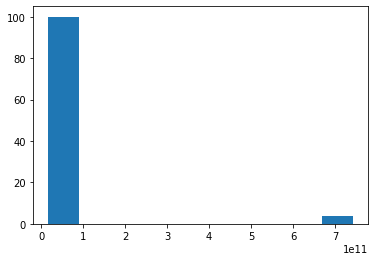

In [9]:
plt.hist(df['d'])

init trajectory plotting class


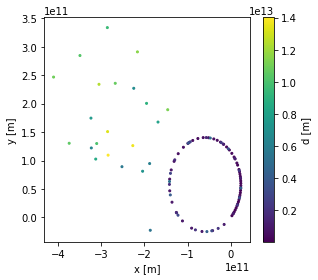

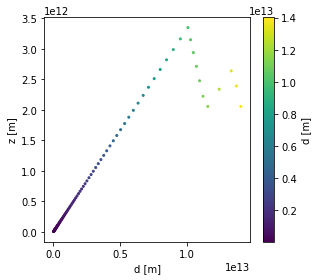

In [11]:
tra = rw.Trajectory(df_time_evolution_observer)
particle_ids = tra.get_particle_ids()
nr_steps = 100
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)
tra.plot_trajectory('d', 'z', 'd', particle_ids[0], nr_steps, None)